In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
## Load the datasets

df = pd.read_csv("Datasets/student_info.csv")

In [3]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
## Check the shape
df.shape

(200, 2)

In [6]:
## Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


## Show the data format

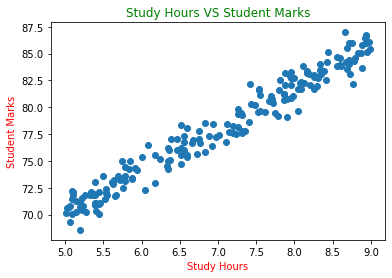

In [8]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("Study Hours", color="red")
plt.ylabel("Student Marks", color="red")
plt.title("Study Hours VS Student Marks", color="Green")
plt.show()

### Prepare the data for machine learning Algorithm

In [9]:
### Check null values
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [10]:
## If we want to check the null value very clearly
df.study_hours[df.study_hours.isnull()]

2     NaN
31    NaN
96    NaN
122   NaN
188   NaN
Name: study_hours, dtype: float64

In [11]:
df[df["study_hours"].isnull()]

,study_hours,student_marks
2,NaN,78.68
31,NaN,76.14
96,NaN,75.39
122,NaN,76.83
188,NaN,77.27


## Fill the missing vlaue Using the 'mean' vlaue

In [12]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [13]:
df2 = df.fillna(df.mean())

In [14]:
df2.isnull().sum().sum()

0

In [15]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


## Split the datasets

In [16]:
X = df2.drop(columns="student_marks")
y = df2.drop(columns="study_hours")

In [17]:
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [18]:
X.head()

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000


In [19]:
y.head()

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19


## split the dataset into train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print("shape of X_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


## Model Creation

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X=x_train, y=y_train)

LinearRegression()

In [25]:
# We know linear model work on y = mx + c

# Check the co-efficient or m vlaue

model.coef_

array([[3.93037294]])

In [26]:
# intercept or 'c' value is 
model.intercept_

array([50.45063632])

In [27]:
y_pred = model.predict(X=x_test)

In [28]:
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [29]:
df3 = pd.DataFrame(np.c_[x_test, y_test, y_pred], columns=["study_hours", "student_marks_original","student_marks_predicted"])

In [30]:
df3.head(20)

,study_hours,student_marks_original,student_marks_predicted
0,8.41,82.50,83.505073
1,5.19,71.18,70.849272
2,5.72,73.25,72.932370
3,8.88,83.64,85.352348
4,5.79,73.64,73.207496
5,8.66,86.99,84.487666
6,7.55,81.18,80.124952
7,7.99,82.75,81.854316
8,7.75,79.50,80.911027
9,8.08,81.70,82.208050


## Fine-tune your model

In [31]:
model.score(x_test, y_test)

0.9521841793508594

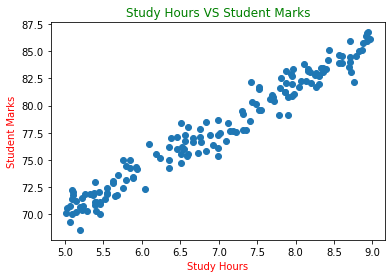

In [32]:
plt.scatter(x=x_train, y=y_train)
plt.xlabel("Study Hours", color="red")
plt.ylabel("Student Marks", color="red")
plt.title("Study Hours VS Student Marks", color="Green")
plt.show()

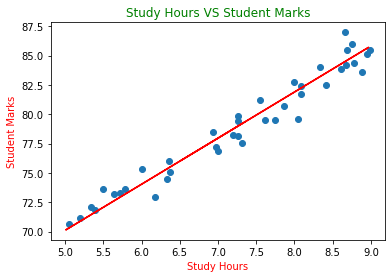

In [33]:
plt.scatter(x_test, y_test)
plt.plot(x_train, model.predict(x_train), color = "r")
plt.xlabel("Study Hours", color="red")
plt.ylabel("Student Marks", color="red")
plt.title("Study Hours VS Student Marks", color="Green")
plt.show()

## Save ML Model

In [34]:
import joblib

In [35]:
joblib.dump(value=model, filename="student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [36]:
## Load model

model2 = joblib.load("student_mark_predictor.pkl")

In [37]:
## test model to give a value

model2.predict([[5]])[0][0]

70.10250100162845